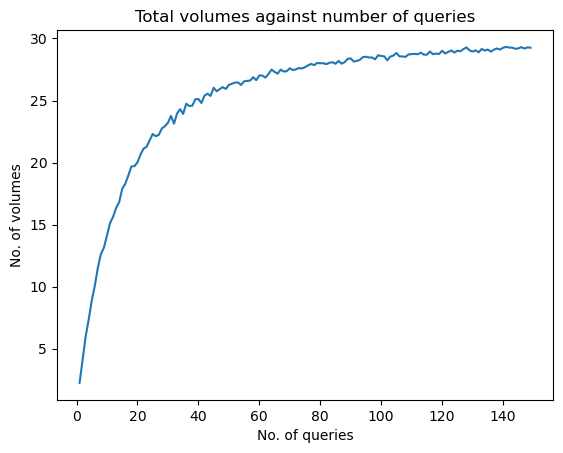

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np

H = []
EDS = {}

def node(start, end):
    global H
    if start == end:
        if (start, start) not in H:  
            H.append((start, start))
        return (start, start)
    
    mid = (start + end) // 2
    left_child = node(start, mid)
    right_child = node(mid + 1, end)
    
    if left_child not in H:
        H.append(left_child)
    
    if right_child not in H:
        H.append(right_child)
    
    combined = (left_child[0], right_child[1])
    if combined not in H:
        H.append(combined)
    
    return combined

LOGmax = 16
node(1, LOGmax)

def cover_query(start, end):
    result = []
    
    def cover(start, end, node_start, node_end):
        if start > node_end or end < node_start:
            return
        if start <= node_start and end >= node_end:
            result.append((node_start, node_end))
            return
        
        mid = (node_start + node_end) // 2
        cover(start, end, node_start, mid)
        cover(start, end, mid + 1, node_end)
    
    cover(start, end, 1, LOGmax)
    return result

def const_query(num_of_qry):
    total_vols = 0

    for _ in range(100):
        vol_tracker = set()
        vol_sum = 0
        
        for _ in range(num_of_qry):
            start = random.randint(1, LOGmax)
            end = random.randint(start, LOGmax)
            query_range = (start, end)
            
            nodes_covered = cover_query(query_range[0], query_range[1])
            
            for child in nodes_covered:
                if child not in vol_tracker:
                    vol_tracker.add(child)
                    vol_sum += 1
        
        total_vols += vol_sum

    return total_vols / 100

x_axis = []
y_axis = []
for v in range(1, 150):
    x_axis.append(v)
    y_axis.append(const_query(v))

plt.plot(x_axis, y_axis)
plt.xlabel("No. of queries")
plt.ylabel("No. of volumes")
plt.title("Total volumes against number of queries")
plt.show()
